In [212]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random
import copy
from sklearn import metrics

In [213]:
dataset = pd.read_csv('Data/Q2.csv')

In [214]:
dataset

,Favorite Color,Favorite Music Genre,Favorite Soft Drink,Gender
0,Cool,Rock,7UP/Sprite,F
1,Neutral,Hip hop,Coca Cola/Pepsi,F
2,Warm,Rock,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Fanta,F
4,Cool,Rock,Coca Cola/Pepsi,F
...,...,...,...,...
61,Cool,Rock,Coca Cola/Pepsi,M
62,Cool,Hip hop,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Fanta,M
64,Cool,Rock,Coca Cola/Pepsi,M


In [215]:
dataset.describe()

,Favorite Color,Favorite Music Genre,Favorite Soft Drink,Gender
count,66,66,66,66
unique,3,7,4,2
top,Cool,Rock,Coca Cola/Pepsi,F
freq,37,19,32,33


No missing value

In [216]:
for i in dataset.columns.values:
    if dataset[i].isnull().sum() > 0:
        print(i)
        print(dataset[i].isnull().sum())
        print(dataset[i].notna().sum())

In [217]:
dataset.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Soft Drink',
       'Gender'],
      dtype='object')

In [218]:
r = len(dataset.index)

Obtain 2 clusters
- it is outcome of algorithm in this link : https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

In [219]:
from statistics import multimode
from sklearn.preprocessing import LabelEncoder

xx = dataset.iloc[:, :-1].values

s = set()
clusternum = 2
columnlen = len(dataset.columns)-1
random.seed(98)
while(len(s)<clusternum):
    s.add(random.randint(0,r))

for i in range(columnlen):
    le = LabelEncoder()
    xx[:,i] = le.fit_transform(xx[:,i])

clusters = []
res = []
tmp = []
for i in range(clusternum):
    tmp.append(0)
tmp.append(-1)

for j in range(r):
    res.append(copy.deepcopy(tmp))
    
for i in s:
    clusters.append(xx[i])

change = 1
while(change == 1):
    change = 0
    
    for i in range(r):
        for c in range(clusternum):
            res[i][c] = 0
    
    for i in range(r):
        for c in range(clusternum):
            for j in range(columnlen):
                if xx[i][j] != clusters[c][j]:
                    res[i][c] += 1
    
    for i in range(r):
        min_v = res[i][0]
        cluster = 0
        for j in range(clusternum):
            if min_v > res[i][j]:
                min_v = res[i][j]
                cluster = j
        if res[i][-1] != cluster:
            res[i][-1] = cluster
            change = 1
    
    c_modes = []
    for i in range(clusternum):
        c_modes.append([])

    for i in range(r):
       c_modes[res[i][-1]].append(xx[i])

    for i in range(clusternum):
        for j in range(columnlen):
            tmp = []
            for z in c_modes[i]:
                tmp.append(z[j])
            clusters[i][j] = random.choice(multimode(tmp))

print(clusters)


[array([2, 4, 2], dtype=object), array([0, 6, 1], dtype=object)]


Evaluate with Davies_Bouldin_score ( not very good cluster )

In [220]:
metrics.davies_bouldin_score(xx, [i[2] for i in res])

2.4425339262870507

Evaluate with Davies_Bouldin_score ( overlapping cluster )

In [221]:
metrics.silhouette_score(xx,[i[2] for i in res])

0.14054279298288602

Plot for 2 cluster
- there is no relation between 2 clusters and gender
- clusters are shown by circle and square
- gender is shown by red for male and blure for female

In [222]:
# Favorite Color	Favorite Music Genre	Favorite Soft Drink	Gender
markercolor = dataset['Gender'].replace("M","red").replace("F","blue")

markershape = []
for i in res:
    if i[2] == 1:
        markershape.append('circle')
    else:
        markershape.append('square')
#Make Plotly figure
fig1 = go.Scatter3d(x=dataset['Favorite Color'],
                    y=dataset['Favorite Music Genre'],
                    z=dataset['Favorite Soft Drink'],
                    marker=dict(color=markercolor,
                                symbol = markershape,
                                
                                opacity=0.9,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Favorite Color"),
                                yaxis=dict( title="Favorite Music Genre"),
                                zaxis=dict(title="Favorite Soft Drink")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("6DPlot.html"))

'6DPlot.html'

In [223]:
dataset = pd.read_csv('Data/Q2.csv')
dataset['Favorite Color'] = dataset['Favorite Color'].replace("Cool", 1).replace("Neutral", 2).replace("Warm", 3)

In [224]:
dataset

,Favorite Color,Favorite Music Genre,Favorite Soft Drink,Gender
0,1,Rock,7UP/Sprite,F
1,2,Hip hop,Coca Cola/Pepsi,F
2,3,Rock,Coca Cola/Pepsi,F
3,3,Folk/Traditional,Fanta,F
4,1,Rock,Coca Cola/Pepsi,F
...,...,...,...,...
61,1,Rock,Coca Cola/Pepsi,M
62,1,Hip hop,Coca Cola/Pepsi,M
63,2,Hip hop,Fanta,M
64,1,Rock,Coca Cola/Pepsi,M


In [225]:
x = dataset.iloc[:, :].values

In [226]:
print(x)

[[1 'Rock' '7UP/Sprite' 'F']
 [2 'Hip hop' 'Coca Cola/Pepsi' 'F']
 [3 'Rock' 'Coca Cola/Pepsi' 'F']
 [3 'Folk/Traditional' 'Fanta' 'F']
 [1 'Rock' 'Coca Cola/Pepsi' 'F']
 [3 'Jazz/Blues' 'Fanta' 'F']
 [1 'Pop' 'Coca Cola/Pepsi' 'F']
 [3 'Pop' 'Fanta' 'F']
 [3 'Rock' '7UP/Sprite' 'F']
 [2 'Pop' 'Coca Cola/Pepsi' 'F']
 [1 'Pop' '7UP/Sprite' 'F']
 [3 'Pop' '7UP/Sprite' 'F']
 [3 'Pop' '7UP/Sprite' 'F']
 [3 'Electronic' 'Coca Cola/Pepsi' 'F']
 [1 'Rock' 'Coca Cola/Pepsi' 'F']
 [3 'Jazz/Blues' 'Coca Cola/Pepsi' 'F']
 [1 'Pop' '7UP/Sprite' 'F']
 [1 'Rock' 'Coca Cola/Pepsi' 'F']
 [1 'Rock' 'Coca Cola/Pepsi' 'F']
 [1 'Pop' '7UP/Sprite' 'F']
 [1 'Pop' 'Fanta' 'F']
 [3 'Jazz/Blues' 'Fanta' 'F']
 [1 'Rock' 'Coca Cola/Pepsi' 'F']
 [3 'Pop' 'Coca Cola/Pepsi' 'F']
 [1 'Folk/Traditional' '7UP/Sprite' 'F']
 [3 'R&B and soul' 'Coca Cola/Pepsi' 'F']
 [1 'Pop' 'Other' 'F']
 [1 'Pop' 'Other' 'F']
 [1 'Pop' 'Coca Cola/Pepsi' 'F']
 [1 'Electronic' 'Fanta' 'F']
 [3 'Rock' 'Coca Cola/Pepsi' 'F']
 [2 'Rock' 'Co

In [227]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse= False), [1,2,3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
np.set_printoptions(threshold = np.inf)
print(x)

[[0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 2]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 3]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 3]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 3]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 3]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 3]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 2]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 3]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 3]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 3]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 3]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0

From elbow method we can say 2 or 3 is good cz its slope decreasing is very low, if we consider clusters 2 high change in slope should choose 3 otherwise it is 2
- Didn't give us good answer, let use silhouette_score and davies_bouldin_score

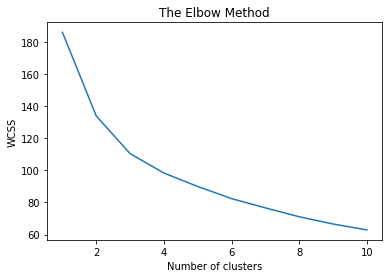

In [228]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 98)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Combining elbow with silhouette and davies_bouldin_score
- silhouette tells us how cluster is compact ( bigger better )
- davies tells us how cluster close to each other ( lower netter )
* we choose 2 from 2 and 3, better silhouette and similar davies bouldin

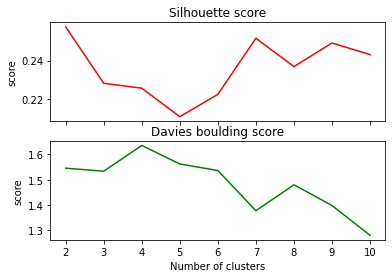

In [229]:
silhouette = []
davis = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 98)
    y_kmeans = kmeans.fit_predict(x)
    silhouette.append(metrics.silhouette_score(x, y_kmeans))
    davis.append(metrics.davies_bouldin_score(x, y_kmeans))
fig, axs = plt.subplots(2)
axs[0].plot(range(2, 11), silhouette, color='r', label='Silhouette score')
axs[1].plot(range(2, 11), davis, color='g', label='Davies boulding score')
axs[0].set_title('Silhouette score')
axs[1].set_title('Davies boulding score')
for ax in axs.flat:
    ax.set(xlabel='Number of clusters', ylabel='score')
    ax.label_outer()
plt.show()

As we obtain from silhouette n = 2

In [230]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 98)
y_kmeans = kmeans.fit_predict(x)

In [231]:
y_kmeans

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Evaluate with davies_bouldin_score and silhouette_score

In [232]:
metrics.davies_bouldin_score(x, y_kmeans)

1.545628471254768

In [233]:
metrics.silhouette_score(x, y_kmeans)

0.25741634488725806

Show the result of clustering with 3D plot which clusters are seperated by shape

In [235]:
dataset['Favorite Color'] = dataset['Favorite Color'].replace(1, "Cool").replace(2, "Neutral").replace(3, "Warm")
markercolor = dataset['Gender'].replace("M","red").replace("F","blue")

markershape = []
for i in y_kmeans:
    if i == 1:
        markershape.append('circle')
    else:
        markershape.append('square')
#Make Plotly figure
fig1 = go.Scatter3d(x=dataset['Favorite Color'],
                    y=dataset['Favorite Music Genre'],
                    z=dataset['Favorite Soft Drink'],
                    marker=dict(color=markercolor,
                                symbol = markershape,
                                
                                opacity=0.9,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Favorite Color"),
                                yaxis=dict( title="Favorite Music Genre"),
                                zaxis=dict(title="Favorite Soft Drink")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("6DPlot.html"))

'6DPlot.html'